In [3]:
import requests
import apimoex
import pandas as pd

with requests.Session() as session:
    data = apimoex.get_board_history(session, 'ABRD')
    df = pd.DataFrame(data)
    df.set_index('TRADEDATE', inplace=True)
    print(df.head(), '\n')
    print(df.tail(), '\n')
    df.info()

           BOARDID   CLOSE  VOLUME   VALUE
TRADEDATE                                 
2014-06-09    TQBR  133.30    4400  586611
2014-06-10    TQBR  131.02    1100  145628
2014-06-11    TQBR  133.89    7100  937910
2014-06-16    TQBR  132.17    5800  772449
2014-06-17    TQBR  131.11    1700  223421 

           BOARDID  CLOSE  VOLUME     VALUE
TRADEDATE                                  
2024-03-11    TQBR  260.2   55990  14628896
2024-03-12    TQBR  259.8   56270  14568502
2024-03-13    TQBR  259.0   55160  14327900
2024-03-14    TQBR  255.4  106300  27106722
2024-03-15    TQBR  255.6   55990  14286934 

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 2014-06-09 to 2024-03-15
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BOARDID  2466 non-null   object 
 1   CLOSE    2141 non-null   float64
 2   VOLUME   2466 non-null   int64  
 3   VALUE    2466 non-null   int64  
dtypes: float64(1), int64(2), object(1)
mem

In [7]:
df['AVR'] = df.VALUE/df.VOLUME

In [17]:
df_cut = df.loc['2023-01-01':]

<Axes: xlabel='TRADEDATE'>

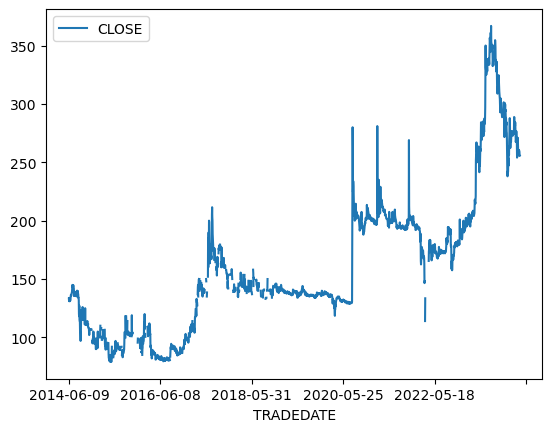

In [18]:
df.plot(y = 'CLOSE', )

In [26]:
df

,BOARDID,CLOSE,VOLUME,VALUE,AVR
TRADEDATE,,,,,
2014-06-09,TQBR,133.30,4400,586611,133.320682
2014-06-10,TQBR,131.02,1100,145628,132.389091
2014-06-11,TQBR,133.89,7100,937910,132.100000
2014-06-16,TQBR,132.17,5800,772449,133.180862
2014-06-17,TQBR,131.11,1700,223421,131.424118
...,...,...,...,...,...
2024-03-11,TQBR,260.20,55990,14628896,261.276942
2024-03-12,TQBR,259.80,56270,14568502,258.903537
2024-03-13,TQBR,259.00,55160,14327900,259.751632


In [40]:
with requests.Session() as session:
    data = apimoex.get_market_history(session, 'YNDX')

In [41]:
pd.DataFrame(data)

,BOARDID,TRADEDATE,CLOSE,VOLUME,VALUE
0,TQBR,2014-06-04,1170.0,35146,4.628872e+07
1,TQBR,2014-06-05,1145.1,24974,2.892730e+07
2,TQBR,2014-06-06,1163.0,7889,9.160131e+06
3,TQBR,2014-06-09,1172.1,7304,8.481667e+06
4,TQBR,2014-06-10,1170.0,3216,3.768586e+06
...,...,...,...,...,...
3003,TQBR,2024-03-11,3544.4,2830108,1.008415e+10
3004,TQBR,2024-03-12,3499.6,948625,3.328143e+09
3005,TQBR,2024-03-13,3588.6,1750681,6.255651e+09
3006,TQBR,2024-03-14,3598.8,1553547,5.568435e+09


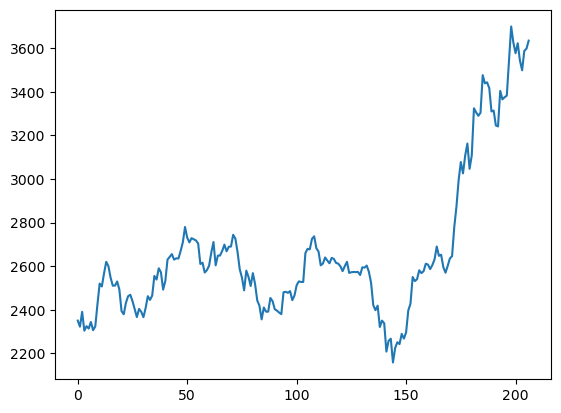

In [37]:
import matplotlib.pyplot as plt

j = requests.get('http://iss.moex.com/iss/engines/stock/markets/shares/securities/YNDX/candles.json?from=2023-05-25&till=2024-03-15&interval=24').json()
data = [{k : r[i] for i, k in enumerate(j['candles']['columns'])} for r in j['candles']['data']]
frame = pd.DataFrame(data)
plt.plot(list(frame['close']))
plt.savefig("shares.png")


In [38]:
frame

,open,close,high,low,value,volume,begin,end
0,2222.0,2350.0,2350.0,2165.6,7.820682e+09,3408528,2023-05-25 00:00:00,2023-05-25 23:59:59
1,2356.0,2322.0,2357.6,2294.2,2.537934e+09,1093150,2023-05-26 00:00:00,2023-05-26 23:59:59
2,2335.0,2390.0,2410.0,2295.6,3.507041e+09,1489054,2023-05-29 00:00:00,2023-05-29 23:59:59
3,2315.0,2303.6,2385.0,2263.0,3.976637e+09,1703701,2023-05-30 00:00:00,2023-05-30 23:59:59
4,2299.6,2324.2,2353.0,2244.2,2.378725e+09,1037156,2023-05-31 00:00:00,2023-05-31 23:59:59
...,...,...,...,...,...,...,...,...
202,3634.4,3544.4,3650.0,3507.4,1.008415e+10,2830108,2024-03-11 00:00:00,2024-03-11 23:59:59
203,3550.0,3499.6,3550.0,3487.6,3.328143e+09,948625,2024-03-12 00:00:00,2024-03-12 23:59:59
204,3499.8,3588.6,3610.0,3488.0,6.255651e+09,1750681,2024-03-13 00:00:00,2024-03-13 23:59:59
205,3589.0,3598.8,3631.8,3550.0,5.568435e+09,1553547,2024-03-14 00:00:00,2024-03-14 23:59:59
